In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Indian_automoble_buying_behavour_study_1.0.csv')

In [3]:
data.head(10)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


In [4]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
data["Profession"].unique

<bound method Series.unique of 0     Salaried
1     Salaried
2     Business
3     Business
4     Salaried
        ...   
94    Business
95    Salaried
96    Business
97    Salaried
98    Salaried
Name: Profession, Length: 99, dtype: object>

In [7]:
data["Profession"].value_counts()

Salaried    64
Business    35
Name: Profession, dtype: int64

In [8]:
obj_cols = data.select_dtypes(include='object')

for col in obj_cols:
    unique_values = data[col].unique()
    print(f"Unique values in {col} are:")
    print(unique_values)
    print()

Unique values in Profession are:
['Salaried' 'Business']

Unique values in Marrital Status are:
['Single' 'Married']

Unique values in Education are:
['Post Graduate' 'Graduate']

Unique values in Personal loan are:
['Yes' 'No']

Unique values in House Loan are:
['No' 'Yes']

Unique values in Wife Working are:
['No' 'Yes' 'm']

Unique values in Make are:
['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']



In [9]:
data.nunique()

Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         3
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64

In [10]:
data['Wife Working'] = data['Wife Working'].replace('m','No')

In [11]:
data.nunique()

Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         2
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64

In [12]:
data["Wife Working"].value_counts()

Yes    52
No     47
Name: Wife Working, dtype: int64

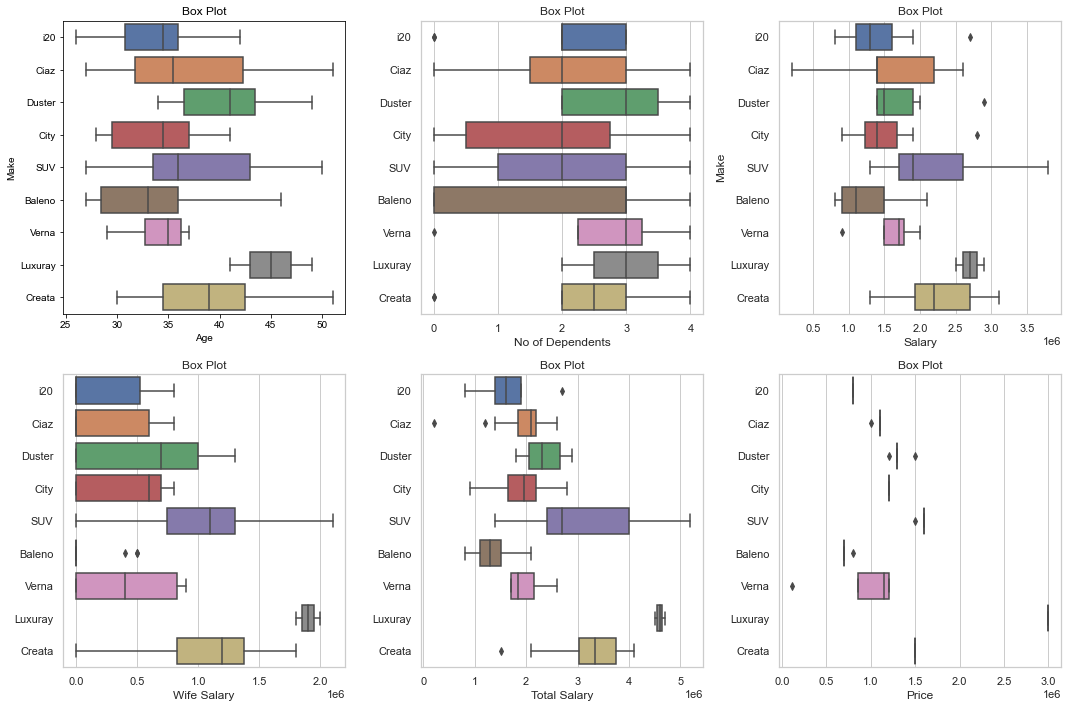

In [13]:
plt.figure(figsize=(15, 10))
n = 0
for i, col in enumerate(['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price'], 1):
    plt.subplot(2, 3, i)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.boxplot(x=col, y='Make', data=data)
    plt.ylabel("Make" if i == 1 or i == 3 else '')
    plt.title('Box Plot')

plt.tight_layout()
plt.show()

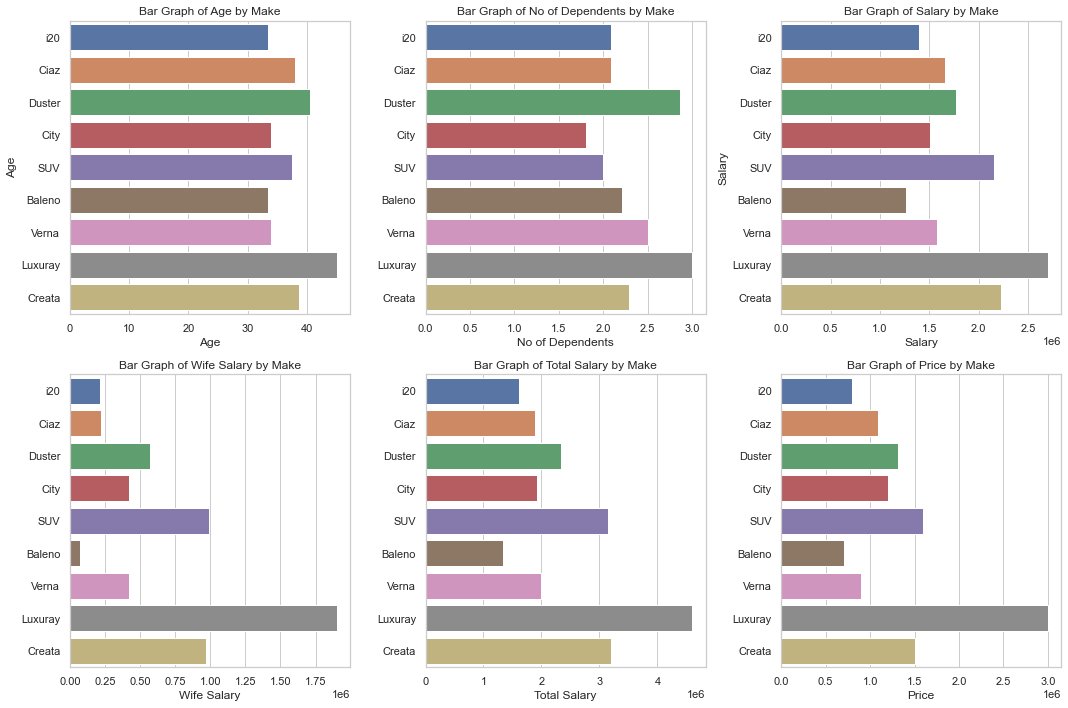

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price'], 1):
    plt.subplot(2, 3, i)
    sns.set(style='whitegrid')
    sns.barplot(x=col, y='Make', data=data, ci=None)
    plt.ylabel(col if i == 1 or i == 3 else '')
    plt.title('Bar Graph of ' + col + ' by Make')
plt.tight_layout()
plt.show()

Observations

(1) Younger individuals tend to choose less expensive cars, indicating a preference for affordability.

(2) Individuals with more dependents tend to favor vehicles that can accommodate additional passengers, such as SUVs.

(3) The distribution of salaries, when compared to the price plot, reveals a clear correlation. The median salary aligns closely with the median price of the vehicles, suggesting a strong and direct relationship between income and vehicle price.

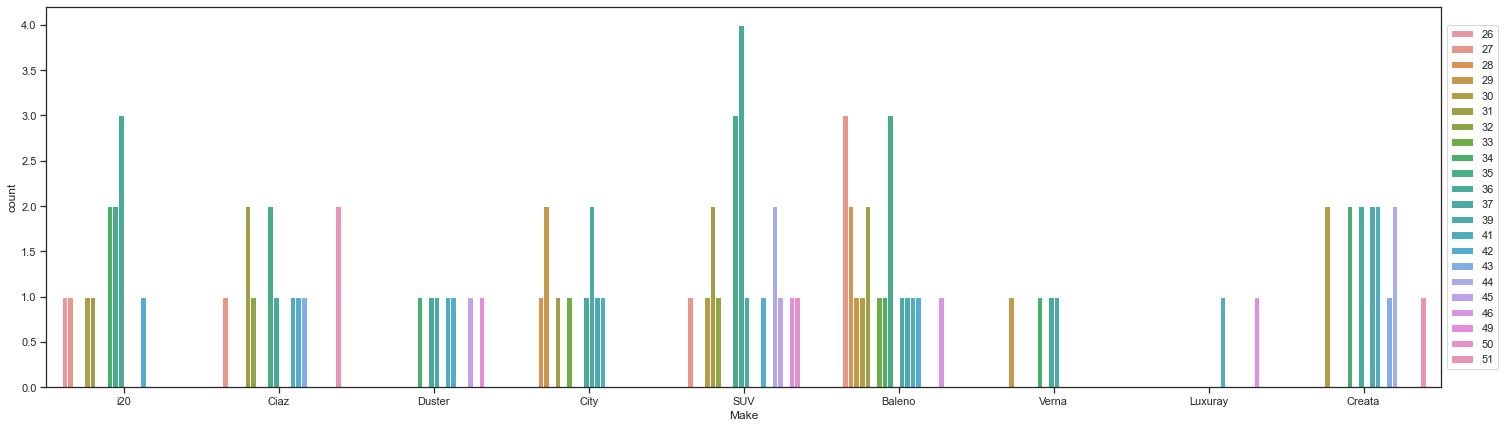

In [15]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize=(25, 7))
sns.countplot(x="Make", data=data, hue="Age")
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

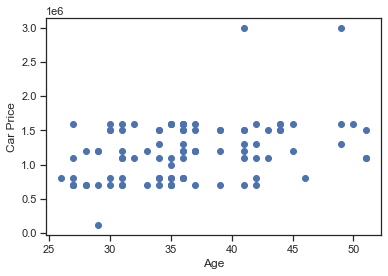

In [16]:
plt.xlabel('Age')
plt.ylabel('Car Price')
plt.scatter(data['Age'],data['Price'])

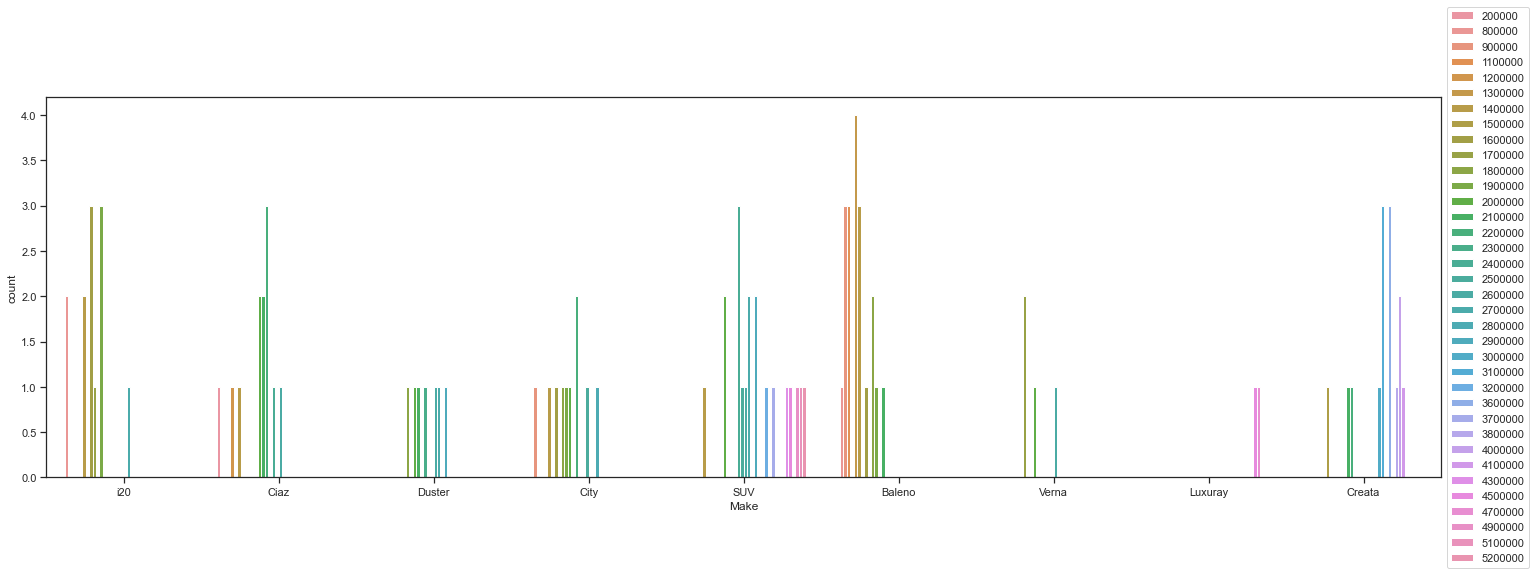

In [17]:
plt.figure(figsize=(25,7))
sns.countplot(x="Make", data=data, hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

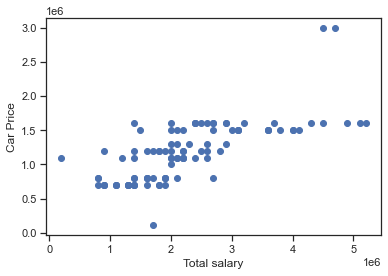

In [18]:
plt.xlabel('Total salary')
plt.ylabel('Car Price')
plt.scatter(data['Total Salary'],data['Price'])

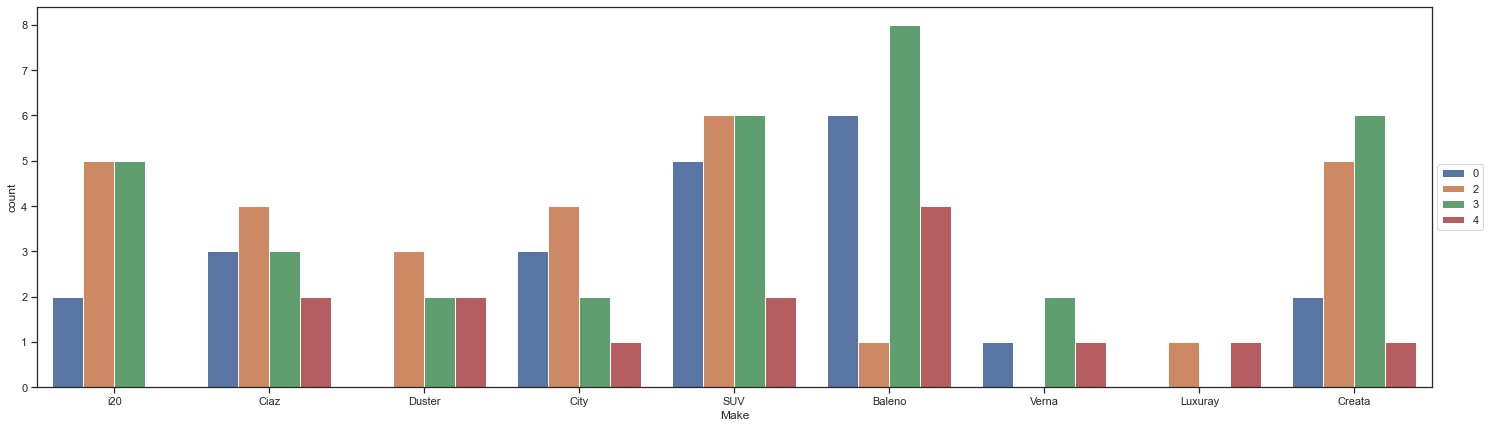

In [19]:
plt.figure(figsize=(25,7))
sns.countplot(x="Make", data=data, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

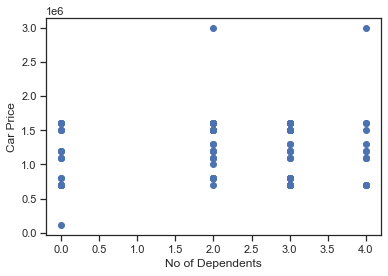

In [20]:
plt.xlabel('No of Dependents')
plt.ylabel('Car Price')
plt.scatter(data['No of Dependents'],data['Price'])

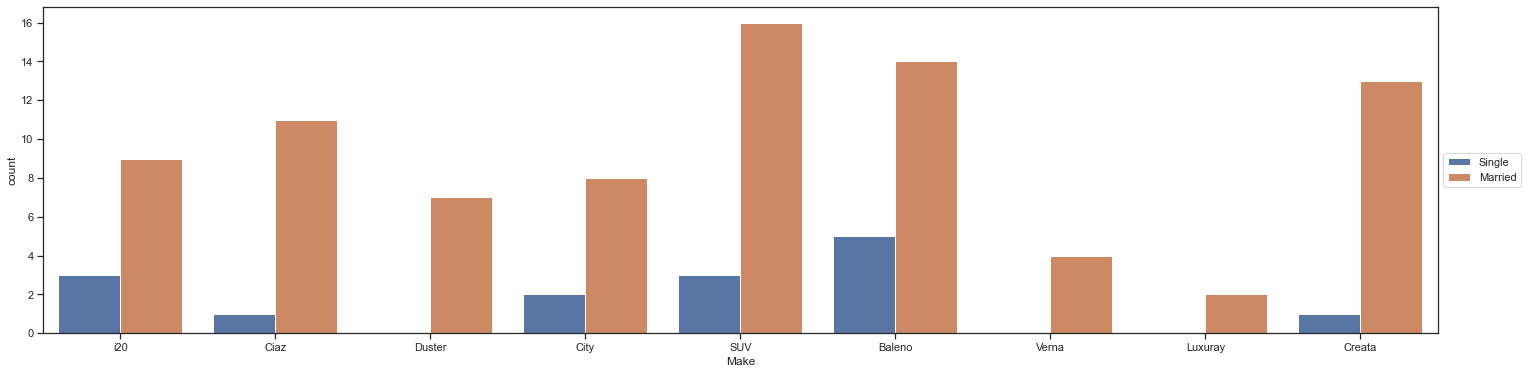

In [21]:
plt.figure(figsize=(25,6))
sns.countplot(x="Make", data=data, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

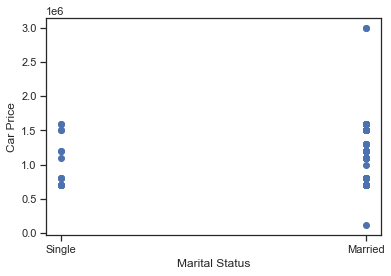

In [22]:
plt.xlabel('Marital Status')
plt.ylabel('Car Price')
plt.scatter(data['Marrital Status'], data['Price'])

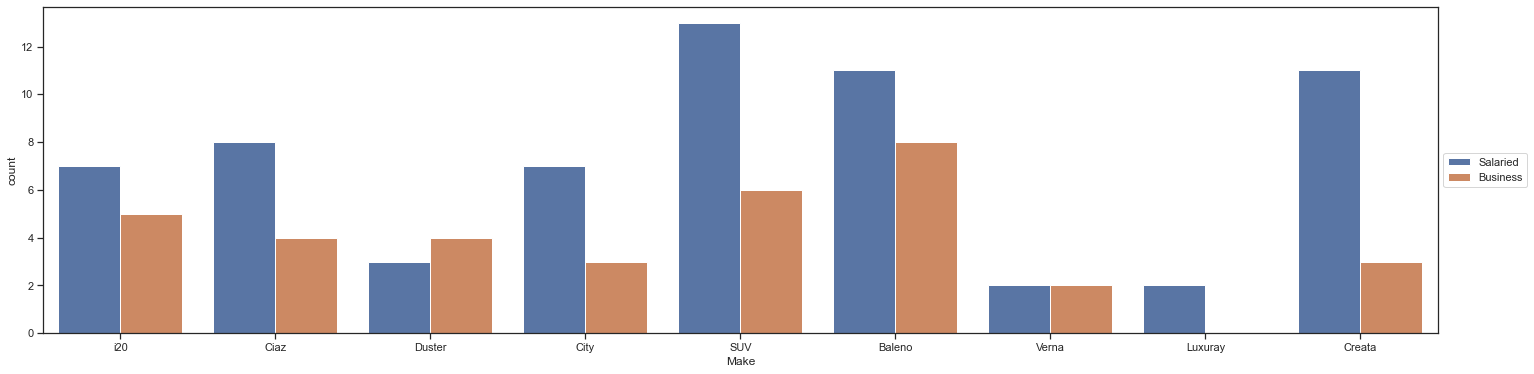

In [23]:
plt.figure(figsize=(25,6))
sns.countplot(x="Make", data=data, hue="Profession")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

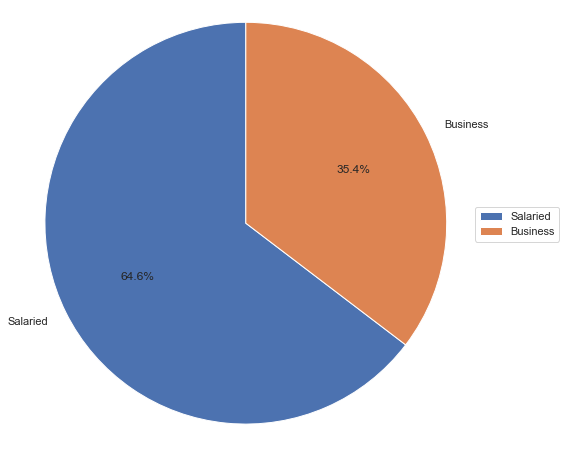

In [24]:
plt.figure(figsize=(8, 8))
profession_counts = data['Profession'].value_counts()
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

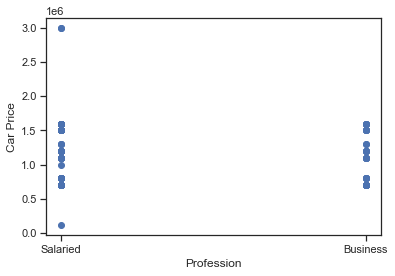

In [25]:
plt.xlabel('Profession')
plt.ylabel('Car Price')
plt.scatter(data['Profession'],data['Price'])

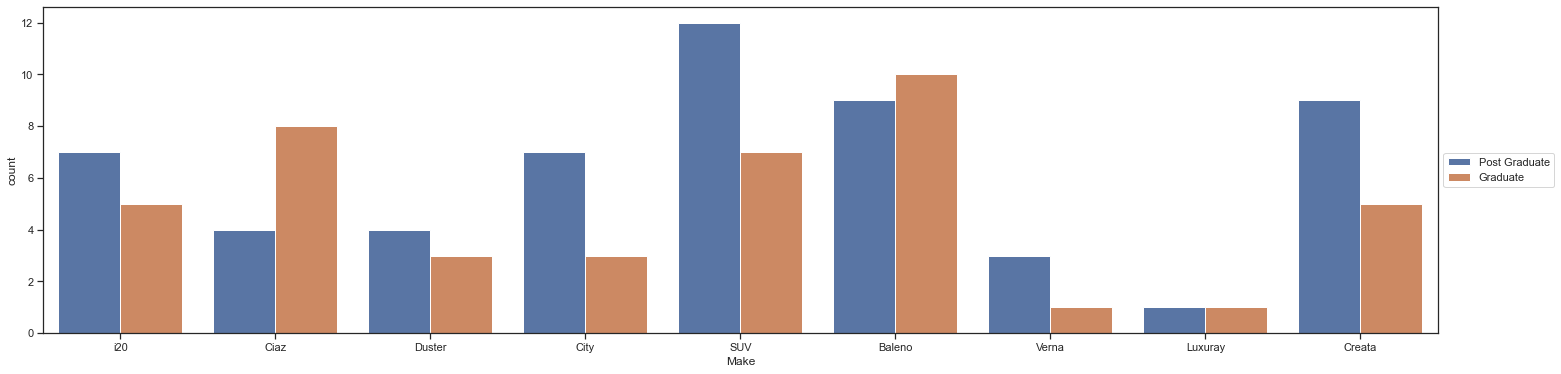

In [26]:
plt.figure(figsize=(25, 6))
sns.countplot(x="Make", data=data, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

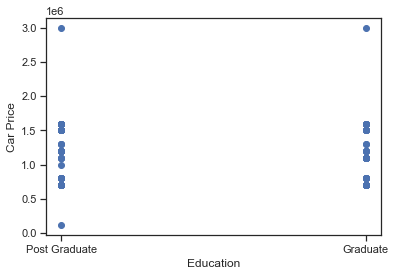

In [27]:
plt.xlabel('Education')
plt.ylabel('Car Price')
plt.scatter(data['Education'],data['Price'])

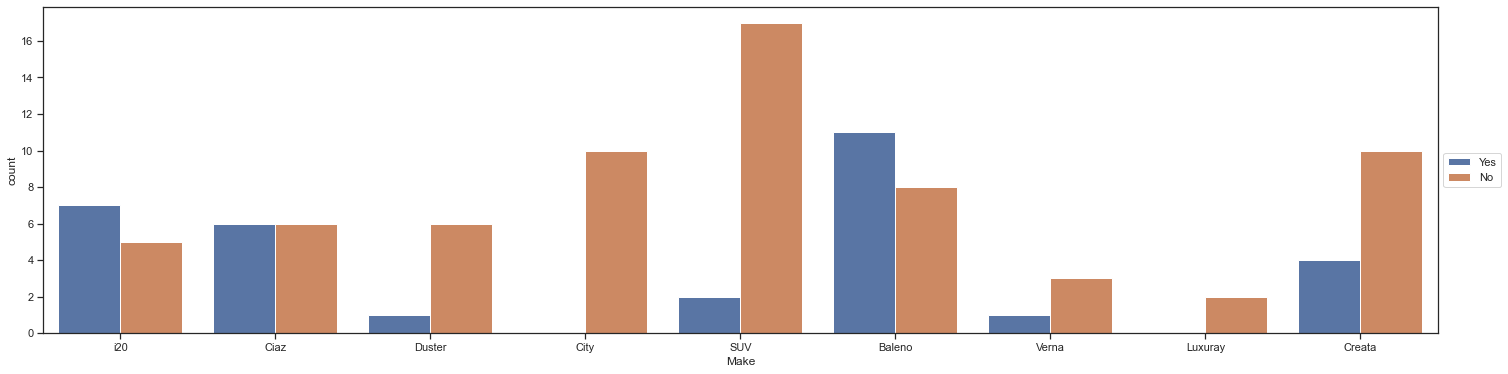

In [28]:
plt.figure(figsize=(25,6))
sns.countplot(x="Make", data=data, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

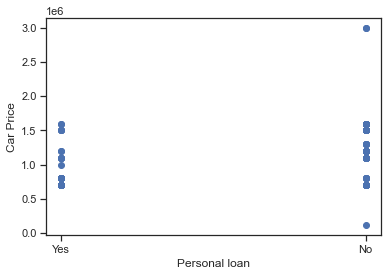

In [29]:
plt.xlabel('Personal loan')
plt.ylabel('Car Price')
plt.scatter(data['Personal loan'],data['Price'])

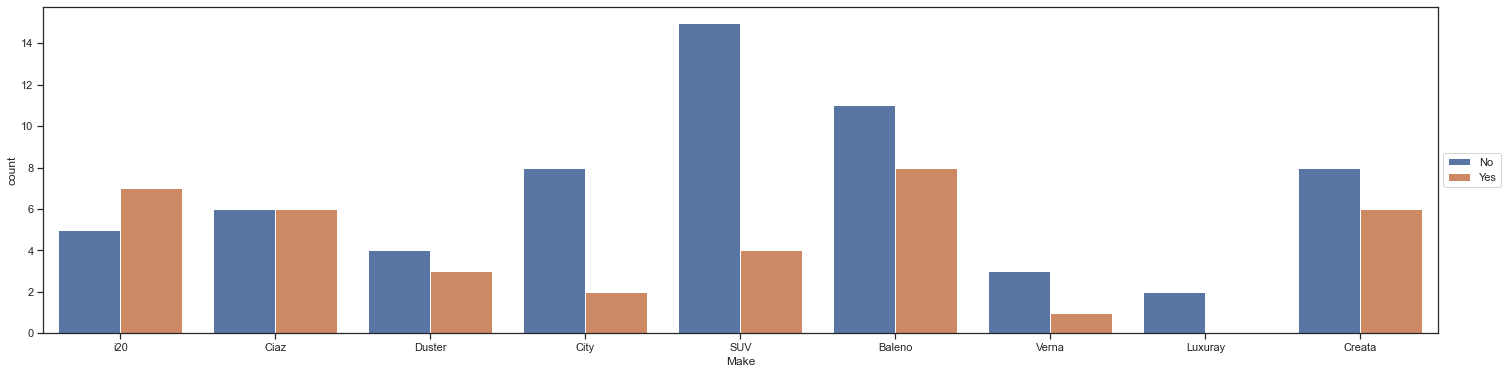

In [30]:
plt.figure(figsize=(25,6))
sns.countplot(x="Make", data=data, hue="House Loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

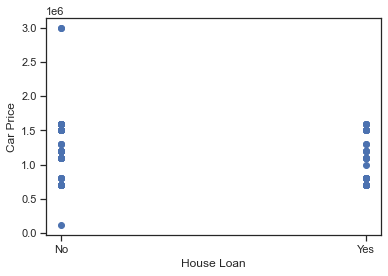

In [31]:
plt.xlabel('House Loan')
plt.ylabel('Car Price')
plt.scatter(data['House Loan'],data['Price'])

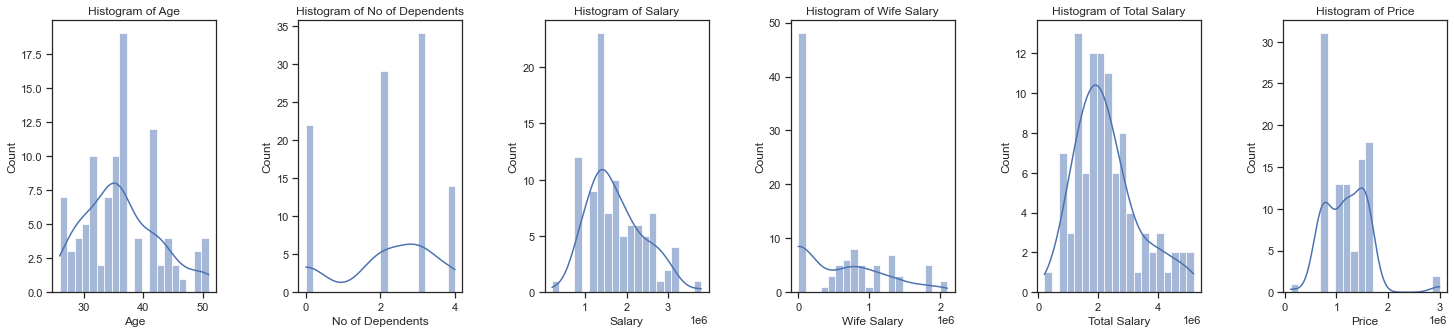

In [32]:
plt.figure(figsize=(25, 5))
n = 0
for x in ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(data[x], kde=True, bins=20)
    plt.title('Histogram of {}'.format(x))
plt.show()

Observations

(1) The consumer market is largely driven by individuals in the age range of 25 to 50, indicating a significant presence of this demographic in the vehicle market.

(2) Customers with an average total salary of around 30 lakhs show a higher tendency to invest in vehicles, suggesting a correlation between income level and purchasing decisions.

(3) Most individuals allocate a budget of 10 to 20 lakhs for their vehicle purchases, highlighting a common price range preferred by the majority of customers.

<AxesSubplot:>

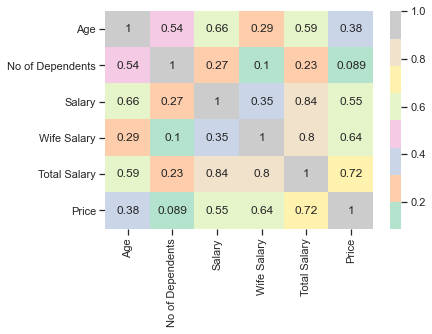

In [33]:
# Heatmap of Correlation
sns.heatmap(data.corr(), annot=True,cmap='Pastel2')

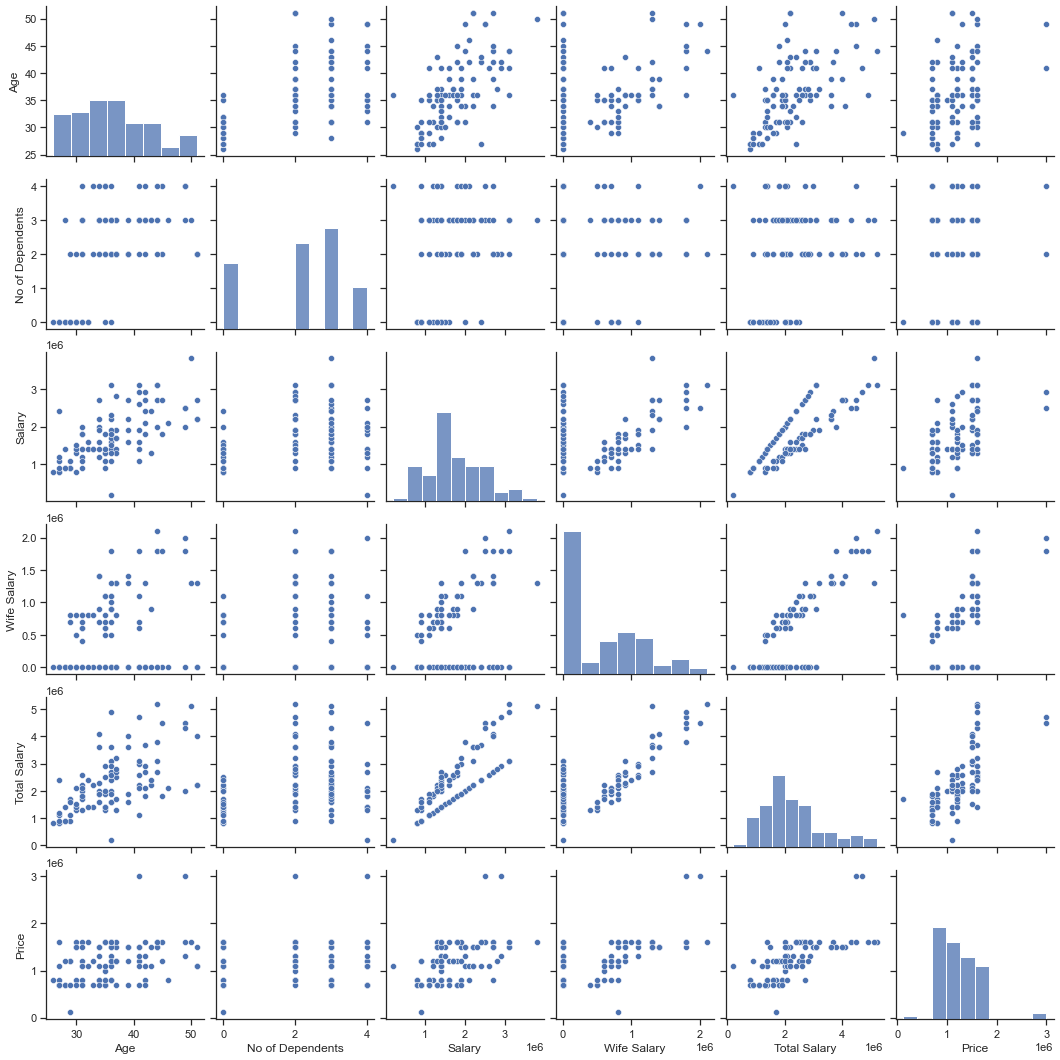

In [34]:
# Pair Plot
sns.pairplot(data)

#### Geographic distribution

In [35]:
data1=pd.read_csv('EV Stats-1.csv')

In [36]:
data1.head(10)

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0
5,6,Goa,0.0,0.0,0.0,0,0.0,513.0,1.0,514.0
6,7,Gujarat,7182.0,217.0,8476.0,0,4.0,15388.0,0.0,31267.0
7,8,Haryana,3162.0,1504.0,13908.0,113,24.0,4878.0,0.0,23589.0
8,9,Himachal Pradesh,0.0,0.0,0.0,0,0.0,98.0,0.0,98.0
9,10,Jammu & Kashmir,2.0,76.0,152.0,0,0.0,208.0,0.0,438.0


In [37]:
data1.tail()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
30,31,Total,27549.0,14069.0,112538.0,389,720.0,105571.0,27.0,260863.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Source,Electric Vehicles Sales report in india - 2018,NaN,NaN,NaN,https://electricvehicles.in/electric-vehicles-...,NaN,NaN,NaN,NaN
33,Additional,Sales of electric vehicles across India from f...,NaN,NaN,NaN,https://www.statista.com/statistics/1234761/in...,NaN,NaN,NaN,NaN
34,Additional,Reasons for preferring an electric car over a ...,NaN,NaN,NaN,statista.com/statistics/1027483/india-electric...,NaN,NaN,NaN,NaN


In [38]:
new_d= data1.drop(data1.tail(5).index)

In [39]:
new_d

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0
5,6,Goa,0.0,0.0,0.0,0,0.0,513.0,1.0,514.0
6,7,Gujarat,7182.0,217.0,8476.0,0,4.0,15388.0,0.0,31267.0
7,8,Haryana,3162.0,1504.0,13908.0,113,24.0,4878.0,0.0,23589.0
8,9,Himachal Pradesh,0.0,0.0,0.0,0,0.0,98.0,0.0,98.0
9,10,Jammu & Kashmir,2.0,76.0,152.0,0,0.0,208.0,0.0,438.0


In [40]:
new_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              30 non-null     object 
 1   State                                                               30 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     float64
 7   Passenger Cars (Cat

In [41]:
new_d['Sl. No'] = new_d['Sl. No'].astype('int64')
new_d['Three Wheelers (Category L5 slow speed as per CMVR)']=new_d['Three Wheelers (Category L5 slow speed as per CMVR)']

In [42]:
new_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              30 non-null     int64  
 1   State                                                               30 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     float64
 7   Passenger Cars (Cat

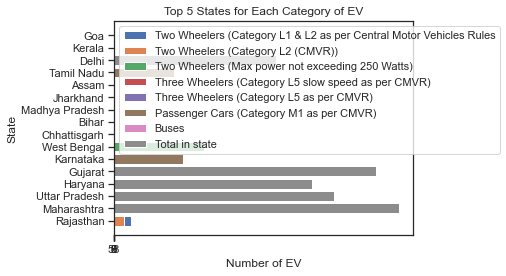

In [43]:
# Define the categories
categories = [
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
    'Two Wheelers (Category L2 (CMVR))',
    'Two Wheelers (Max power not exceeding 250 Watts)',
    'Three Wheelers (Category L5 slow speed as per CMVR)',
    'Three Wheelers (Category L5 as per CMVR)',
    'Passenger Cars (Category M1 as per CMVR)',
    'Buses',
    'Total in state'
]

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the categories
for category in categories:
    # Sort the DataFrame by the current category and get the top 5 states
    top_states = new_d.sort_values(category, ascending=True).tail(5)

    # Plot the horizontal bar chart for the current category
    ax.barh(top_states['State'], top_states[category], label=category)

# Set the title and labels
ax.set_title('Top 5 States for Each Category of EV')
ax.set_xlabel('Number of EV')
ax.set_ylabel('State')

plt.tight_layout()
ax.legend()
plt.show()
     

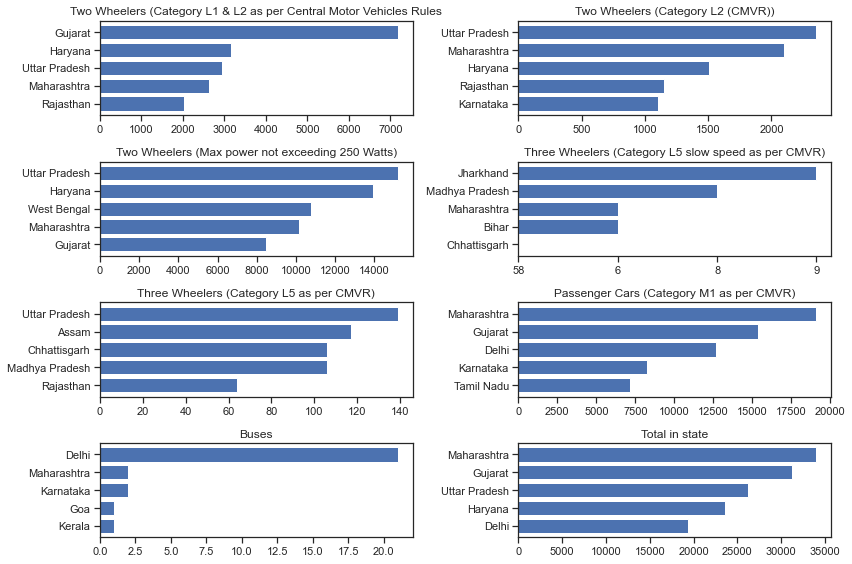

In [44]:
# Calculate the number of rows and columns for the subplots
num_rows = (len(categories) - 1) // 2 + 1
num_cols = min(2, len(categories))

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate over the categories and corresponding subplots
for i, category in enumerate(categories):
    # Calculate the subplot indices
    row = i // num_cols
    col = i % num_cols

    # Sort the DataFrame by the current category and get the top 5 states
    top_states = new_d.sort_values(category, ascending=True).tail(5)

    # Plot the horizontal bar chart for the current category in the corresponding subplot
    axs[row, col].barh(top_states['State'], top_states[category])
    axs[row, col].set_title(category)

plt.tight_layout()
plt.show()


In [45]:
print(new_d.dtypes)

Sl. No                                                                  int64
State                                                                  object
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    float64
Two Wheelers (Category L2 (CMVR))                                     float64
Two Wheelers (Max power not exceeding 250 Watts)                      float64
Three Wheelers (Category L5 slow speed as per CMVR)                    object
Three Wheelers (Category L5 as per CMVR)                              float64
Passenger Cars (Category M1 as per CMVR)                              float64
Buses                                                                 float64
Total in state                                                        float64
dtype: object


In [46]:
new_d['Three Wheelers (Category L5 slow speed as per CMVR)'] = pd.to_numeric(new_d['Three Wheelers (Category L5 slow speed as per CMVR)'], errors='coerce')

In [47]:
print(new_d.dtypes)

Sl. No                                                                  int64
State                                                                  object
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    float64
Two Wheelers (Category L2 (CMVR))                                     float64
Two Wheelers (Max power not exceeding 250 Watts)                      float64
Three Wheelers (Category L5 slow speed as per CMVR)                     int64
Three Wheelers (Category L5 as per CMVR)                              float64
Passenger Cars (Category M1 as per CMVR)                              float64
Buses                                                                 float64
Total in state                                                        float64
dtype: object


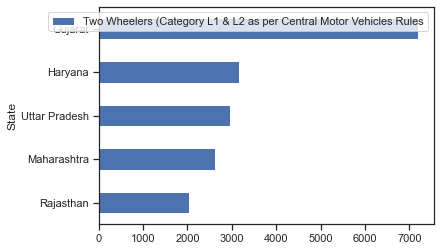

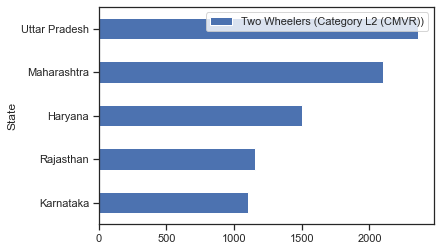

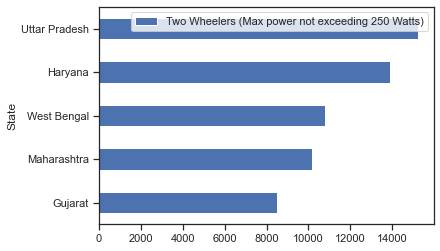

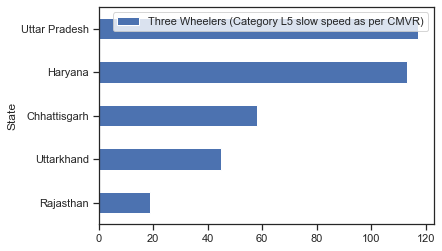

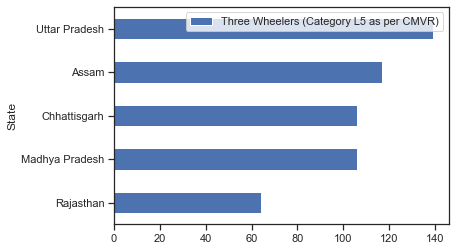

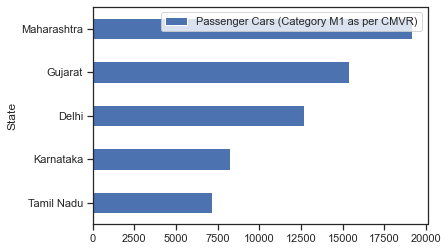

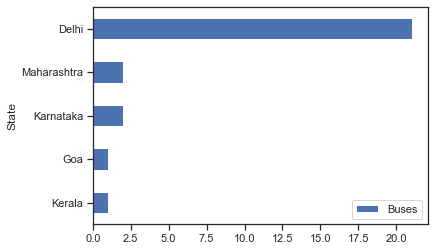

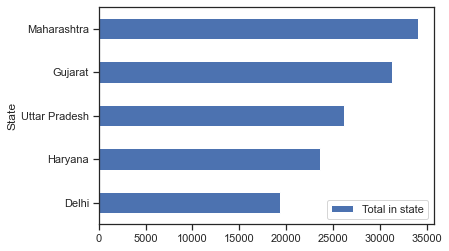

In [48]:
# Top 5 states for each category of EV
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax = new_d.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)


#### K-Means Clustering

In [49]:
X = data.iloc[:,data.columns!='Make']
X.head()
     

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [50]:
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

In [51]:
obj_df = X.replace(encoding)
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


In [52]:
obj_df.dtypes

Age                 int64
Profession          int64
Marrital Status     int64
Education           int64
No of Dependents    int64
Personal loan       int64
House Loan          int64
Wife Working        int64
Salary              int64
Wife Salary         int64
Total Salary        int64
Price               int64
dtype: object

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [55]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
     

E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

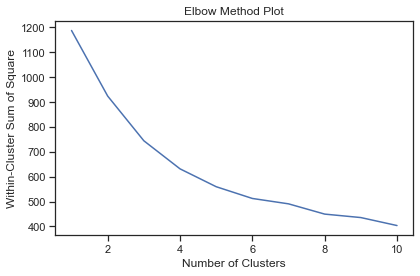

In [56]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

#### Assuming K=3

In [57]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)
KMeans(n_clusters=3, random_state=42)

E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [58]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [59]:
final_data1 = pd.concat([data,y_df],axis=1)
final_data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,2
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,1
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,0
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,1


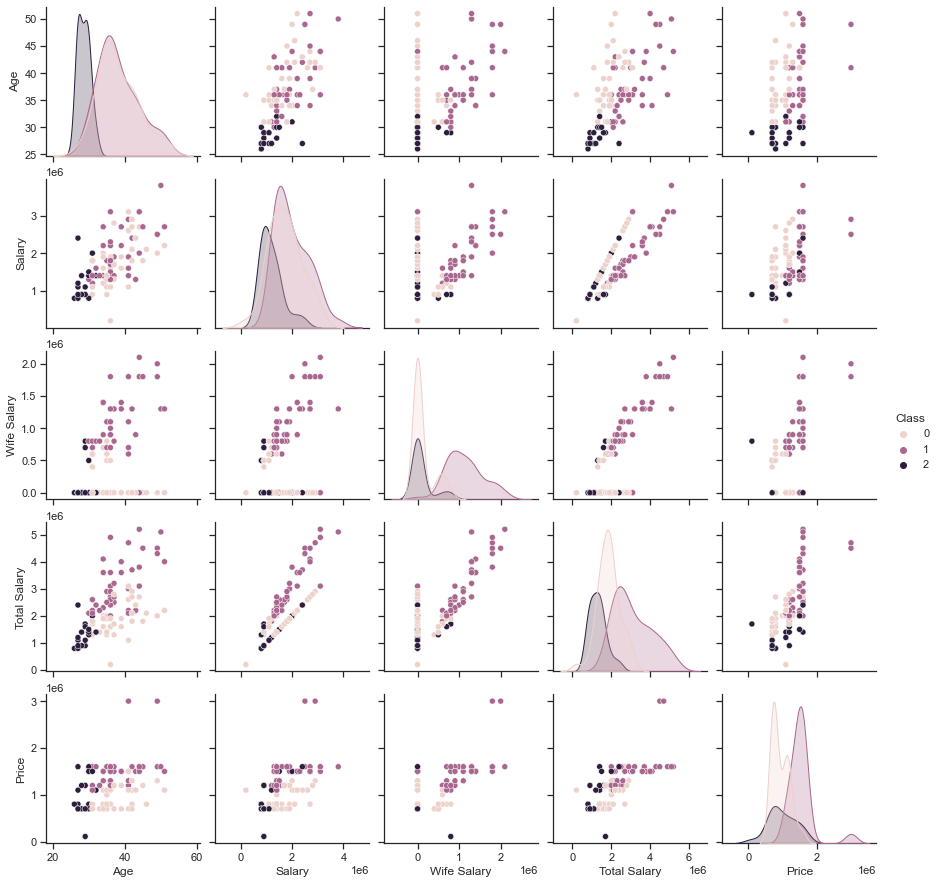

In [60]:
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

#### For K=5

In [61]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans1.fit(X_scaled)
KMeans(n_clusters=5, random_state=42)

E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [62]:
y1 = kmeans1.predict(X_scaled)
y1_df = pd.DataFrame(y1,columns=['Class'])

In [63]:
final_data2 = pd.concat([data,y1_df],axis=1)
final_data2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,4
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,4
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,1
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,0
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,4
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,0


E:\Users\SHALINI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


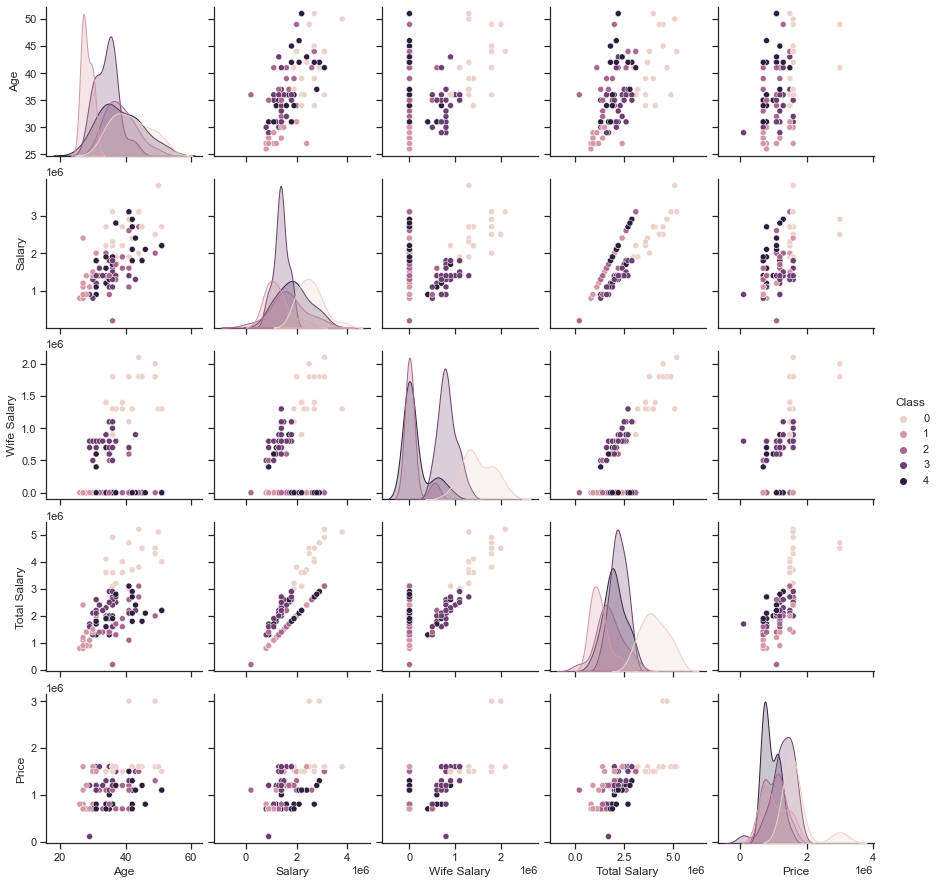

In [64]:
sns.pairplot(final_data2,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

In [65]:
df_charge = pd.read_csv("Electric_Vehical_charging_station.csv")

In [66]:
df_charge.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [67]:
df_charge.head(-20)

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service
...,...,...,...,...,...,...,...,...,...
177,178,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
178,179,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
179,180,NDMC,"Talkatora Stadium, President's Estate, New Del...","Electric Vehicle Charger, Talkatora Stadium, P...",28.625294,77.195234,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
180,181,NDMC,"Talkatora Garden, President's Estate, New Delh...","Electric Vehicle Charger, Talkatora Garden, Pr...",28.624836,77.195244,CCS/ChADEMO/ Type 2 AC,142kW,Self Service


In [68]:
df_charge.region.unique()

array(['NDMC', 'CMRL', 'Maha Metro', 'Noida Authority', 'SDMC', 'NKDA',
       'NRANVP', 'ANERT'], dtype=object)

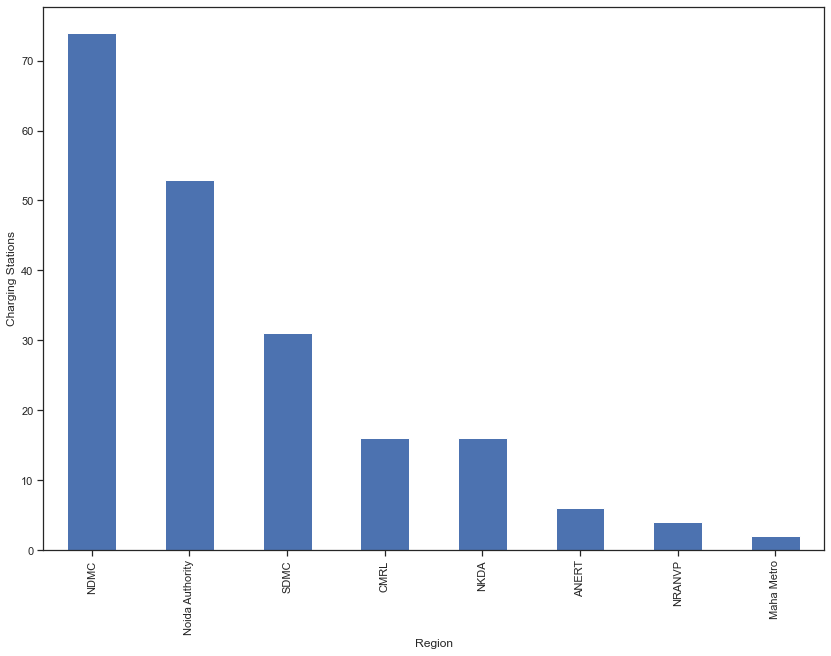

In [69]:
plt.figure(figsize=(14,10))
df_charge.region.value_counts().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Charging Stations")
plt.show()

Observations

In the future, the adoption of electric vehicles is expected to significantly increase, particularly in two regions where there is a higher concentration of electric vehicle charging stations compared to other areas:

(1) NDMC (New Delhi)

(2) Noida Authority (City in Uttar Pradesh)

These regions are likely to experience a greater surge in electric vehicle usage due to the existing infrastructure of charging stations, indicating a favorable environment for electric vehicle adoption and support.